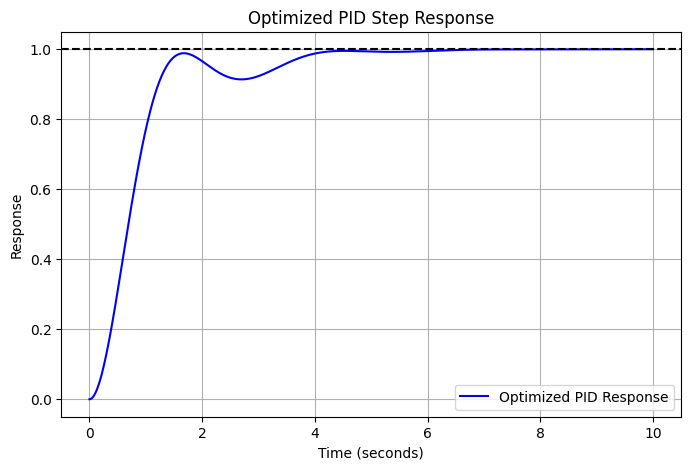

Optimized PID Gains (Python):
Kp = 5.850
Ki = 1.166
Kd = 3.370


In [ ]:
# Re-import necessary libraries since the execution state was reset
!pip install control

import numpy as np
import control as ctrl
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the plant transfer function G(s) = 1 / (s^3 + 3s^2 + 5s + 1)
num = [1]  # Numerator
den = [1, 3, 5, 1]  # Denominator
G = ctrl.TransferFunction(num, den)

# Initial PID parameters (from Ziegler-Nichols)
Kp_init = 5.836
Ki_init = 1.164
Kd_init = 3.347
initial_guess = [Kp_init, Ki_init, Kd_init]

# Define the cost function to minimize overshoot and settling time
def pid_cost(params, G):
    """ Compute cost function based on overshoot and settling time """
    Kp, Ki, Kd = params

    # Define PID Controller in Parallel Form: C(s) = Kp + Ki/s + Kd*s
    C = ctrl.TransferFunction([Kd, Kp, Ki], [1, 0])
    H = ctrl.feedback(C * G)  # Closed-loop system

    # Simulate step response
    t, y = ctrl.step_response(H, np.linspace(0, 10, 1000))

    # Compute Overshoot (percentage)
    overshoot = (max(y) - 1) * 100  # Convert to percentage

    # Settling time: ensure response stays within ±2% of final value
    tolerance = 0.02
    steady_state_value = y[-1]  # Final value
    within_tolerance = np.abs(y - steady_state_value) <= tolerance * np.abs(steady_state_value)

    # Settling time: check when it enters and stays in the 2% band
    if np.any(within_tolerance):
        last_index = np.where(within_tolerance)[0][-1]
        settling_time = t[last_index]
    else:
        settling_time = 10  # Assign max time if not settled

    # Cost function: Prioritize lower overshoot and shorter settling time
    J = (overshoot ** 2) + (settling_time ** 2)

    return J

# Run optimization using scipy.optimize.minimize with Nelder-Mead
optimal_params = minimize(
    pid_cost,
    initial_guess,
    args=(G,),
    method='Nelder-Mead',
    options={'xatol': 1e-4, 'fatol': 1e-4, 'maxiter': 5000}  # Improve convergence
)

# Extract optimized PID parameters
Kp_opt, Ki_opt, Kd_opt = optimal_params.x

# Design the optimized PID controller
C_opt = ctrl.TransferFunction([Kd_opt, Kp_opt, Ki_opt], [1, 0])  # PID in parallel form
H_opt = ctrl.feedback(C_opt * G)  # Closed-loop system

# Simulate step response
t = np.linspace(0, 10, 1000)
t, y = ctrl.step_response(H_opt, t)

# Plot optimized response
plt.figure(figsize=(8, 5))
plt.plot(t, y, 'b', linewidth=1.5)
plt.axhline(1, color='k', linestyle='--', label="Setpoint")
plt.xlabel('Time (seconds)')
plt.ylabel('Response')
plt.title('Optimized PID Step Response')
plt.legend(['Optimized PID Response'])
plt.grid()
plt.show()

# Display optimal PID values
print("Optimized PID Gains (Python):")
print(f"Kp = {Kp_opt:.3f}")
print(f"Ki = {Ki_opt:.3f}")
print(f"Kd = {Kd_opt:.3f}")



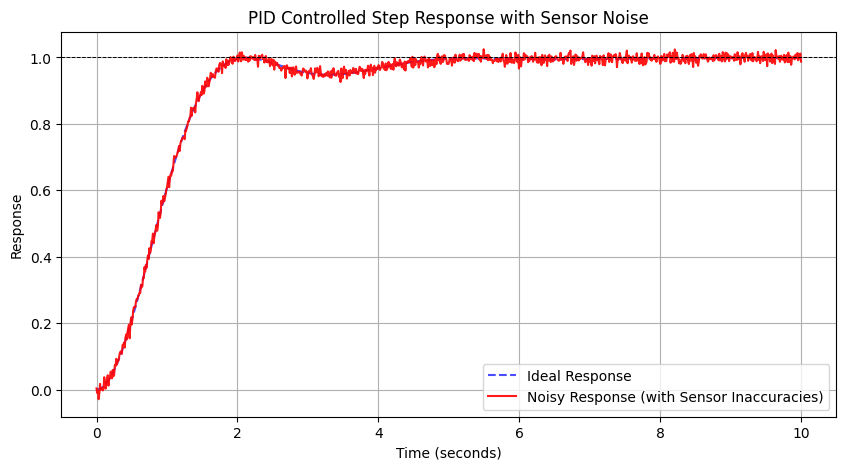

In [ ]:
!pip install control

import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Define the plant transfer function G(s) = 1 / (s^3 + 3s^2 + 5s + 1)
num = [1]  # Numerator
den = [1, 3, 5, 1]  # Denominator
G = ctl.tf(num, den)

# Define PID Controller C(s) = Kp + Ki/s + Kd * s
Kp = 5    # Proportional gain
Ki = 1    # Integral gain
Kd = 2    # Derivative gain

# PID Controller in Transfer Function Form
C = ctl.tf([Kd, Kp, Ki], [1, 0])  # (Kd * s^2 + Kp * s + Ki) / s

# Closed-loop System H(s) = (C(s) * G(s)) / (1 + C(s) * G(s))
H = ctl.feedback(C * G, 1)

# Time vector for simulation
t = np.linspace(0, 10, 1000)  # Simulate for 10 seconds

# Step response of the closed-loop system
t, y = ctl.step_response(H, t)

# Add random noise to simulate sensor inaccuracies
noise_amplitude = 0.01  # Adjust noise level
noise = noise_amplitude * np.random.normal(size=len(y))  # Gaussian noise
y_noisy = y + noise

# Plot the response
plt.figure(figsize=(10, 5))
plt.plot(t, y, label="Ideal Response", color='b', linestyle="dashed", alpha=0.7)
plt.plot(t, y_noisy, label="Noisy Response (with Sensor Inaccuracies)", color='r', alpha=0.9)
plt.axhline(y=1, color='k', linestyle='--', linewidth=0.7)  # Desired setpoint
plt.xlabel("Time (seconds)")
plt.ylabel("Response")
plt.title("PID Controlled Step Response with Sensor Noise")
plt.legend()
plt.grid()
plt.show()


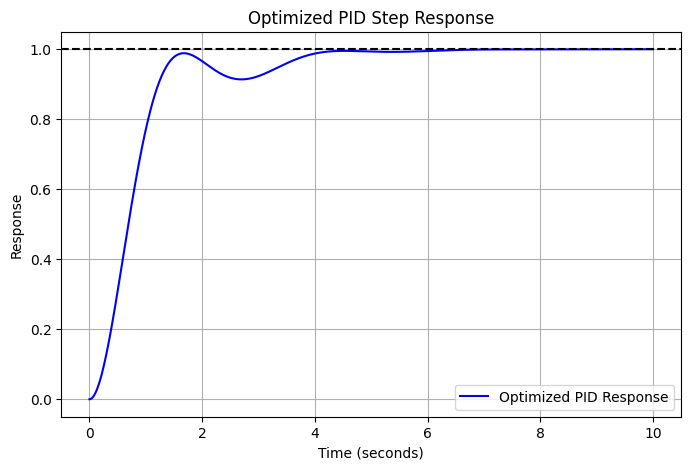

Optimized PID Gains (Python):
Kp = 5.850
Ki = 1.166
Kd = 3.370


In [ ]:
# Re-import necessary libraries since the execution state was reset
!pip install control

import numpy as np
import control as ctrl
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the plant transfer function G(s) = 1 / (s^3 + 3s^2 + 5s + 1)
num = [1]  # Numerator
den = [1, 3, 5, 1]  # Denominator
G = ctrl.TransferFunction(num, den)

# Initial PID parameters (from Ziegler-Nichols)
Kp_init = 5.836
Ki_init = 1.164
Kd_init = 3.347
initial_guess = [Kp_init, Ki_init, Kd_init]

# Define the cost function to minimize overshoot and settling time
def pid_cost(params, G):
    """ Compute cost function based on overshoot and settling time """
    Kp, Ki, Kd = params

    # Define PID Controller in Parallel Form: C(s) = Kp + Ki/s + Kd*s
    C = ctrl.TransferFunction([Kd, Kp, Ki], [1, 0])
    H = ctrl.feedback(C * G)  # Closed-loop system

    # Simulate step response
    t, y = ctrl.step_response(H, np.linspace(0, 10, 1000))

    # Compute Overshoot (percentage)
    overshoot = (max(y) - 1) * 100  # Convert to percentage

    # Settling time: ensure response stays within ±2% of final value
    tolerance = 0.02
    steady_state_value = y[-1]  # Final value
    within_tolerance = np.abs(y - steady_state_value) <= tolerance * np.abs(steady_state_value)

    # Settling time: check when it enters and stays in the 2% band
    if np.any(within_tolerance):
        last_index = np.where(within_tolerance)[0][-1]
        settling_time = t[last_index]
    else:
        settling_time = 10  # Assign max time if not settled

    # Cost function: Prioritize lower overshoot and shorter settling time
    J = (overshoot ** 2) + (settling_time ** 2)

    return J

# Run optimization using scipy.optimize.minimize with Nelder-Mead
optimal_params = minimize(
    pid_cost,
    initial_guess,
    args=(G,),
    method='Nelder-Mead',
    options={'xatol': 1e-4, 'fatol': 1e-4, 'maxiter': 5000}  # Improve convergence
)

# Extract optimized PID parameters
Kp_opt, Ki_opt, Kd_opt = optimal_params.x

# Design the optimized PID controller
C_opt = ctrl.TransferFunction([Kd_opt, Kp_opt, Ki_opt], [1, 0])  # PID in parallel form
H_opt = ctrl.feedback(C_opt * G)  # Closed-loop system

# Simulate step response
t = np.linspace(0, 10, 1000)
t, y = ctrl.step_response(H_opt, t)

# Plot optimized response
plt.figure(figsize=(8, 5))
plt.plot(t, y, 'b', linewidth=1.5)
plt.axhline(1, color='k', linestyle='--', label="Setpoint")
plt.xlabel('Time (seconds)')
plt.ylabel('Response')
plt.title('Optimized PID Step Response')
plt.legend(['Optimized PID Response'])
plt.grid()
plt.show()

# Display optimal PID values
print("Optimized PID Gains (Python):")
print(f"Kp = {Kp_opt:.3f}")
print(f"Ki = {Ki_opt:.3f}")
print(f"Kd = {Kd_opt:.3f}")

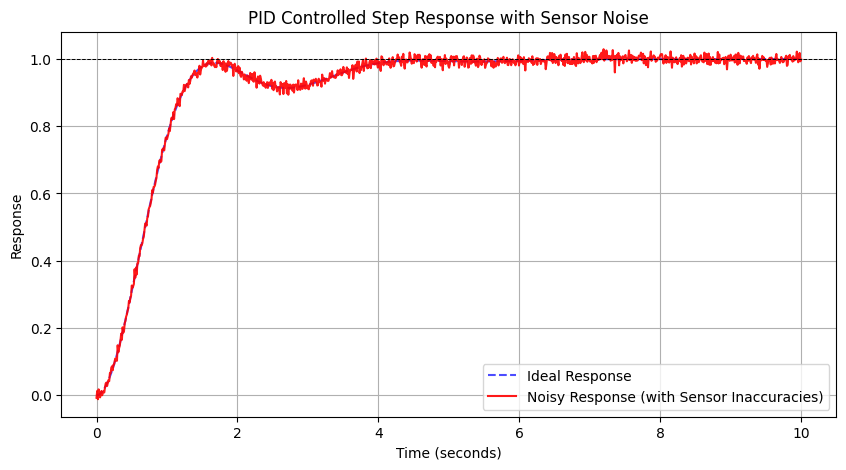

In [ ]:
!pip install control

import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Define the plant transfer function G(s) = 1 / (s^3 + 3s^2 + 5s + 1)
num = [1]  # Numerator
den = [1, 3, 5, 1]  # Denominator
G = ctl.tf(num, den)

# Define PID Controller C(s) = Kp + Ki/s + Kd * s
Kp = 5.850    # Proportional gain
Ki = 1.166    # Integral gain
Kd = 3.370    # Derivative gain

# PID Controller in Transfer Function Form
C = ctl.tf([Kd, Kp, Ki], [1, 0])  # (Kd * s^2 + Kp * s + Ki) / s

# Closed-loop System H(s) = (C(s) * G(s)) / (1 + C(s) * G(s))
H = ctl.feedback(C * G, 1)

# Time vector for simulation
t = np.linspace(0, 10, 1000)  # Simulate for 10 seconds

# Step response of the closed-loop system
t, y = ctl.step_response(H, t)

# Add random noise to simulate sensor inaccuracies
noise_amplitude = 0.01  # Adjust noise level
noise = noise_amplitude * np.random.normal(size=len(y))  # Gaussian noise
y_noisy = y + noise

# Plot the response
plt.figure(figsize=(10, 5))
plt.plot(t, y, label="Ideal Response", color='b', linestyle="dashed", alpha=0.7)
plt.plot(t, y_noisy, label="Noisy Response (with Sensor Inaccuracies)", color='r', alpha=0.9)
plt.axhline(y=1, color='k', linestyle='--', linewidth=0.7)  # Desired setpoint
plt.xlabel("Time (seconds)")
plt.ylabel("Response")
plt.title("PID Controlled Step Response with Sensor Noise")
plt.legend()
plt.grid()
plt.show()